# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [1]:
# Importing  libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [145]:
# read data
data = pd.read_csv("Classified Data")
data = pd.DataFrame(data)
data.columns = [i.lower() for i in data.columns] 
print("DataFrame Shape :",data.shape)
data.head()

DataFrame Shape : (1000, 11)


,wtt,pti,eqw,sbi,lqe,qwg,fdj,pjf,hqe,nxj,target class
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [146]:
# checking for null values in our data (luckily we don't have any)
data.isnull().sum()/len(data)*100

wtt             0.0
pti             0.0
eqw             0.0
sbi             0.0
lqe             0.0
qwg             0.0
fdj             0.0
pjf             0.0
hqe             0.0
nxj             0.0
target class    0.0
dtype: float64

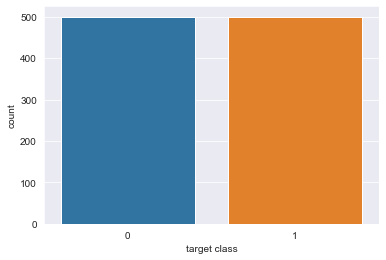

In [4]:
# data seems almost balanced
sns.countplot(data["target class"])

In [147]:
# for scaling our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [148]:
x = data.drop(["target class"],axis = 1 )
scaled_x = sc.fit_transform(x)
y  = data["target class"]
print("InDependent Feature Shape :",scaled_x.shape)
print("Dependent   Feature Shape :",y.shape)

InDependent Feature Shape : (1000, 10)
Dependent   Feature Shape : (1000,)


# Train and Test Split

In [149]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,test_size = 0.3,random_state = 43)

# K Nearest Neighbors ,
## where  k refer's to number of nearest  neighbors

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [151]:
# let's choose k = 1 (say for example)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print("Confusion Matrix : When K = 1")
print(confusion_matrix(ytest,ypred))
print("Classification Report --->")
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

Confusion Matrix : When K = 1
[[132  17]
 [ 11 140]]
Classification Report --->
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.89      0.93      0.91       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

0.9066666666666666


# let's choose an optimal Value For K

## we'll  Calculate  F1 - Score  for different K values, and than we'll use K value which gives an optimal F1 - Score .
(The reason behind using F1-score is that, it always  gives Low False postive rate and Low False Negtive rate )
#### Closer the value of F1-score to 1 : better Prediction done by  model
#### Closer the value of F1-score to 0 : poor Prediction done by model

In [153]:
# performing cross validation in order to avoid overfitting and underfitting 
from sklearn.model_selection import cross_val_score

In [154]:
# Calculate F1 - Score Value For K values 1 to 25 (different neighbor values) . 
   
F1_SCORE = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    f1_score = cross_val_score(knn,scaled_x,y,cv = 10,scoring = "f1")
    F1_SCORE.append(f1_score.mean())
#F1_SCORE   

Text(0, 0.5, "F1_SCORE Value's")

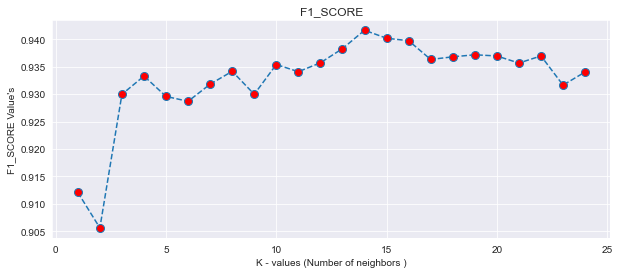

In [155]:
plt.rcParams['figure.figsize'] = (10,4)
plt.plot(range(1,25),F1_SCORE,linestyle = "dashed",marker = "o",markerfacecolor = "r",markersize=8)
plt.title("F1_SCORE")
plt.xlabel("K - values (Number of neighbors )")
plt.ylabel("F1_SCORE Value's")

## as you can see for k value >13 our  F1_score fluctuate little bit only.
let's use k = 13 (nearest neighbors)

In [156]:
# let's choose k = 1 (say for example)
model = KNeighborsClassifier(n_neighbors=13)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print("Confusion Matrix : When K = 1")
print(confusion_matrix(ytest,ypred))
print("Classification Report --->")
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

Confusion Matrix : When K = 1
[[137  12]
 [  4 147]]
Classification Report --->
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       149
           1       0.92      0.97      0.95       151

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

0.9466666666666667


In [ ]:
Note : on using k = 13  or k >13 (up to some extend) our  accuracy,recall,precision,f1-score  increase's 

# Thank You :)